In [39]:
#importing the necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

In [35]:
#Getting the data ready 
data=pd.read_csv('winequality-red.csv')
print(data.head())
print(data.dtypes)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
#Checking for the missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#Basic statistics derivation
print(data.describe())
print(data.info())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

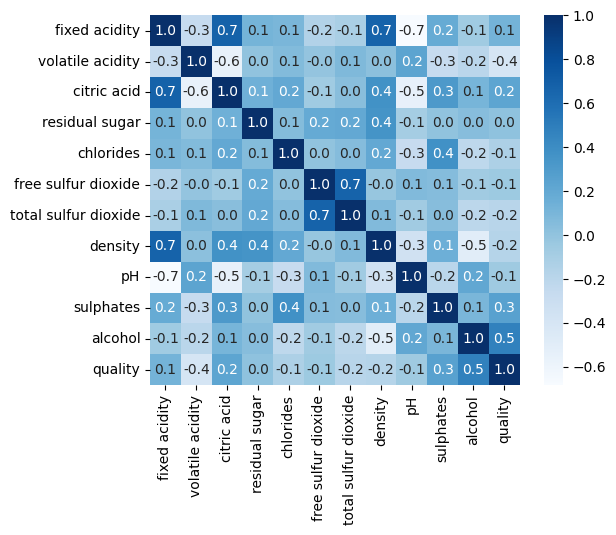

In [15]:
#we are using a heatmap to understand the correlation  between the columns
correlation=data.corr()
sns.heatmap(correlation,annot=True,square=True,cbar=True,fmt='.1f',cmap='Blues')
plt.show()

In [21]:
#splitting the data 
X=data.drop('quality',axis=1)
Y=data['quality'].apply(lambda y:1 if y>=7 else 0)
print(X.shape,Y.shape)

(1599, 11) (1599,)


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
#model training 
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9

In [29]:
#determing the accuracy of the model 
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(f"The overall accuracy of the model is {accuracy*100:.2f}%")

The overall accuracy of the model is 90.00%


In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


In [43]:
#predicting something 
input_data=input("Enter the list of inputs to check the wine quality seperated by commas").split(',')
new_inputs=[float(num) for num in input_data]
numpy_object=np.array(new_inputs).reshape(1,-1)
y_pred=model.predict(numpy_object)
if y_pred==1:
    print("The Wine is edible and has high quality")
else:
    print("The Wine is inedible and has low quality")

Enter the list of inputs to check the wine quality seperated by commas 7.4, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.00, 0.45, 8.8


The Wine is inedible and has low quality
